In [263]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.spatial.distance import euclidean,cosine,pdist,squareform,cdist
from IPython.display import Image
from IPython.core.display import Image, display
import PIL
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
odf_path = '/Users/bechtel/Work/Insight/shoezam/feature_extraction/frnt_no_features_data_oxfords_boats_boots.csv'
oxf_path = '/Users/bechtel/Work/Insight/shoezam/feature_extraction/frnt_features_fc2_data_oxfords_boats_boots.csv'
oxf = pd.read_csv(oxf_path,index_col=0).values
odf = pd.read_csv(odf_path,index_col=0)


In [110]:
full_path = '/Users/bechtel/Work/Insight/shoezam/feature_extraction/full_data_oxfords_boats_boots.csv'
fulldf = pd.read_csv(full_path,index_col=0)

In [111]:
fulldf['subcategory'].unique()

array(['Boat Shoes', 'Sneakers & Athletic Shoes', 'Loafers', 'Boots',
       'Oxfords'], dtype=object)

In [113]:
slimdf = fulldf[fulldf['subcategory'].isin(['Boat Shoes', 'Boots','Oxfords'])]

In [114]:
slimdf['subcategory'].unique()

array(['Boat Shoes', 'Boots', 'Oxfords'], dtype=object)

In [117]:
oxf = slimdf.iloc[:,14:].values
odf = slimdf.iloc[:,:14]
odf.reset_index(drop=True,inplace=True)

In [9]:
def find_top_matches(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None):
        input_feature_vec = oxf[input_image_index,:][None,:]
        if user_category in ['Boots','Oxfords','Boat Shoes']:
            # define rows that belong to user category 
            user_cat_idx = odf.index[self.odf['subcategory']==user_category].tolist()
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf[user_cat_idx,:]
            # get pandas by subcategory 
            odf_by_cat = odf.iloc[user_cat_idx,:]
        else:
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf
            # get pandas by subcategory 
            odf_by_cat = odf
        print("oxf_by_cat.shape : {} ".format(oxf_by_cat.shape))
        print("odf_by_cat.shape : {} ".format(odf_by_cat.shape))

        print('oxf.shape: {}'.format(oxf.shape))
        #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
        distances = cdist(input_feature_vec,oxf_by_cat, classifier)
        print('distances.shape : {}'.format(distances.shape))
        best_args = np.argsort(distances[0,:])[:top_n]
        print('distances[best_args]: \n{}'.format(distances[0,best_args]))
        print('best_args: {}'.format(best_args)) 
        best_match = best_args[0]
        similar_matches = best_args[1:]
        best_match_row = odf_by_cat.iloc[best_match,:]
        #best_match_row = self.odf.iloc[best_match,:]
        print('best_match_row : {}'.format(best_match_row))
        top_keys = []
        top_indices = []
        best_rows = []
        for i, image_index in enumerate(similar_matches):
            #key = self.odf['key'].iloc[image_index]
            key = odf_by_cat['key'].iloc[image_index]
            best_rows.append(odf_by_cat.iloc[image_index,:])
            if key not in top_keys:
                top_keys.append(key)
                top_indices.append(image_index)

        print('top_indices: {}'.format(top_indices))
        print('top_keys: {}'.format(top_keys))
        #prices = self.odf['msrp'].iloc[top_indices].values
        prices = odf_by_cat['msrp'].iloc[top_indices].values
        print('prices: {}'.format(prices))
        indices_in_increasing_price = np.argsort(prices)
        lowest_price_image_index = top_indices[indices_in_increasing_price[0]]
        highest_price_image_index = top_indices[indices_in_increasing_price[-1]]

        #print('lowest_price_image_row :\n{}'.format(self.odf.iloc[lowest_price_image_index,:]))
        #print('highest_price_image_row :\n{}'.format(self.odf.iloc[highest_price_image_index,:]))
        print('lowest_price_image_row :\n{}'.format(odf_by_cat.iloc[lowest_price_image_index,:]))
        print('highest_price_image_row :\n{}'.format(odf_by_cat.iloc[highest_price_image_index,:]))
        if best_match_row is not None:
            print("best_match_row is not None")
        #if self.odf.iloc[lowest_price_image_index,:] is not None:
        if odf_by_cat.iloc[lowest_price_image_index,:] is not None:
            print("self.odf.iloc[lowest_price_image_index,:] is not None")
        #if self.odf.iloc[highest_price_image_index,:] is not None:
        if odf_by_cat.iloc[highest_price_image_index,:] is not None:
            print("self.odf.iloc[highest_price_image_index,:] is not None")
        #return best_match_row,self.odf.iloc[lowest_price_image_index,:],self.odf.iloc[highest_price_image_index,:]
        return best_match_row,odf_by_cat.iloc[lowest_price_image_index,:],odf_by_cat.iloc[highest_price_image_index,:],best_rows


In [61]:
def find_zap_matches(input_image_index,oxf,odf,classifier='euclidean',user_category=None):
        input_feature_vec = oxf[input_image_index,:][None,:]
        if user_category in ['Boots','Oxfords','Boat Shoes']:
            # define rows that belong to user category 
            user_cat_idx = odf.index[self.odf['subcategory']==user_category].tolist()
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf[user_cat_idx,:]
            # get pandas by subcategory 
            odf_by_cat = odf.iloc[user_cat_idx,:]
        else:
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf
            # get pandas by subcategory 
            odf_by_cat = odf
        print("oxf_by_cat.shape : {} ".format(oxf_by_cat.shape))
        print("odf_by_cat.shape : {} ".format(odf_by_cat.shape))

        print('oxf.shape: {}'.format(oxf.shape))
        #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
        distances = cdist(input_feature_vec,oxf_by_cat, classifier)
        print('distances.shape : {}'.format(distances.shape))
        best_args = np.argsort(distances[0,:])[:]
        
        like_product_indices = [odf_by_cat[odf_by_cat['key']==str(odf_by_cat.iloc[input_index,:]['like_product_key_{}'.format(lpi)])].index.values for lpi in range(4)]
        ranks_by_product = []
        for pi,product_indices in enumerate(like_product_indices):
            print(product_indices)
            product_ranks = []
            for image_index in product_indices:
                print('image_index : {}'.format(image_index))
                print('npwhere : {}'.format(np.where(best_args==image_index)[0]))
                product_ranks.append(np.where(best_args==image_index)[0][0])
            ranks_by_product.append(product_ranks)
                
        
                
                
        print('distances[best_args]: \n{}'.format(distances[0,best_args]))
        print('best_args: {}'.format(best_args)) 
        best_match = best_args[0]
        similar_matches = best_args[1:]
        best_match_row = odf_by_cat.iloc[best_match,:]
        #best_match_row = self.odf.iloc[best_match,:]
        print('best_match_row : {}'.format(best_match_row))
        top_keys = []
        top_indices = []
        best_rows = []
        for i, image_index in enumerate(similar_matches):
            #key = self.odf['key'].iloc[image_index]
            key = odf_by_cat['key'].iloc[image_index]
            best_rows.append(odf_by_cat.iloc[image_index,:])
            if key not in top_keys:
                top_keys.append(key)
                top_indices.append(image_index)

        return best_match_row,best_rows,ranks_by_product


In [145]:
def find_zap_ranks(input_image_index,oxf,odf,classifier='euclidean',user_category=None):
        input_feature_vec = oxf[input_image_index,:][None,:]
        if user_category in ['Boots','Oxfords','Boat Shoes']:
            # define rows that belong to user category 
            user_cat_idx = odf.index[odf['subcategory']==user_category].tolist()
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf[user_cat_idx,:]
            # get pandas by subcategory 
            odf_by_cat = odf.iloc[user_cat_idx,:]
            odf_by_cat.reset_index(drop=True,inplace=True)
        else:
            # get numpy feature vec by subcategory 
            oxf_by_cat = oxf
            # get pandas by subcategory 
            odf_by_cat = odf
        print("oxf_by_cat.shape : {} ".format(oxf_by_cat.shape))
        print("odf_by_cat.shape : {} ".format(odf_by_cat.shape))

        #print('oxf.shape: {}'.format(oxf.shape))
        #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
        distances = cdist(input_feature_vec,oxf_by_cat, classifier)
        print('distances.shape : {}'.format(distances.shape))
        best_args = np.argsort(distances[0,:])[:]
        
        like_product_indices = [odf_by_cat[odf_by_cat['key']==str(odf_by_cat.iloc[input_image_index,:]['like_product_key_{}'.format(lpi)])].index.values for lpi in range(4)]
        for lpk in range(0,4):
            print('like_product_key: {}'.format(odf_by_cat.iloc[input_image_index,:]['like_product_key_{}'.format(lpk)]))
        
        ranks_by_product = []
        product_placements  = []
        for pi,product_indices in enumerate(like_product_indices):
            print('product_indices: {}'.format(product_indices))
            product_ranks = []
            pplacements = []
            for image_index in product_indices:
                print('cur image_index key: {}'.format(odf_by_cat.iloc[image_index,:]['key']))
                print('image_index : {}'.format(image_index))
                print('npwhere (this is rank) : {}'.format(np.where(best_args==image_index)[0]))
                #if len(np.where(best_args==image_index)[0])>0:
                print('n rows of odf (should be same as rank...): {}'.format(odf_by_cat.iloc[best_args[0:np.where(best_args==image_index)[0][0]],:].shape))
                print('num unique keys : {}'.format(len(odf_by_cat.iloc[best_args[0:np.where(best_args==image_index)[0][0]],:]['key'].unique())))
                pplacements.append(len(odf_by_cat.iloc[best_args[0:np.where(best_args==image_index)[0][0]],:]['key'].unique()))
                product_ranks.append(np.where(best_args==image_index)[0][0])
            ranks_by_product.append(product_ranks)
            product_placements.append(pplacements)
                
        
    

        return ranks_by_product,product_placements

In [15]:
def display_matches(input_image_index,top_n,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    print('Original Image')
    PATH = best_row['image_path']
    display(Image(filename = PATH, width=100, height=100))
    for i in range(len(best_matches)):
        sim1_PATH = best_matches[i]['image_path']
        like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
        zap_sim = False
        if best_matches[i]['key'] in like_keys:
            zap_sim = True
        print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
        #print('path: {}'.format(PATH))
        display(Image(filename = sim1_PATH, width=100, height=100))

In [147]:
def calc_min_product_ranks(num,oxf,odf,classifier='euclidean',user_category=None):
    min_product_ranks = []
    prod_placements = []
    if user_category is None:
        ind_list = np.random.choice(oxf.shape[0],num)
    elif user_category in ['Boat Shoes','Boots','Oxfords']:
        ind_list = np.random.choice(odf[odf['subcategory']==user_category].shape[0],num)
    for i in ind_list:
        ranks_by_product,product_placements = find_zap_ranks(i,oxf,odf,user_category=user_category)
        count = 0
        mins = []
        placements = []
        for like_product_list,pplacement in zip(ranks_by_product,product_placements):
            if like_product_list is not None and len(like_product_list)==4:
                mins.append(min(like_product_list))
                placements.append(pplacement[np.argmin(like_product_list)])
                #min_product_ranks.append(min(like_product_list))
                count +=1
        prod_placements.append(placements)
        min_product_ranks.append(mins)
        #mins = [min(like_product_list) for like_product_list in ranks_by_product]
        #avg = sum(mins)/float(count)
        #average_mins_by_product.append(avg)
    return min_product_ranks,prod_placements

In [419]:
def calc_rand_and_match_distributions(sample_size, odf, oxf,user_category):
    oxf = oxf[odf['subcategory']==user_category,:]
    odf = odf[odf['subcategory']==user_category].reset_index(inplace=False,drop=True)
    print('odf.shape: {}'.format(odf.shape))
    print('oxf.shape: {}'.format(oxf.shape))
    preds = []
    preds_left_and_right = []
    preds_top = []
    preds_pair = []
    noise_vec = []
    for j in range(10):
        rand_sample = np.random.choice(oxf.shape[0],sample_size)
        
        rand_key = odf.iloc[np.random.randint(1,oxf.shape[0]),:]['key']
        for i in rand_sample:
            input_feature_vec = oxf[i,:][None,:]
            curr_key = odf.iloc[i,:]['key']
            curr_view = odf.iloc[i,:]['view']
            #print('key: {}'.format(curr_key))
            #print('oxf.shape: {}'.format(oxf.shape))
            #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
            distances = cdist(input_feature_vec,oxf, 'euclidean')
            #print('distances.shape : {}'.format(distances.shape))
            best_args = np.argsort(distances[0,:])[1:]
            tmpdf = odf.iloc[best_args,:].reset_index(drop=True)
            indexes = tmpdf[tmpdf['key']==curr_key].index.values
            #print('indexes: {}'.format(indexes.index.values))
            min_ind = min(indexes)+1
            if curr_view=='pair':
                preds_pair.append(min_ind)
            elif curr_view=='top':
                preds_top.append(min_ind)
            elif curr_view in ['left','right']:
                preds_left_and_right.append(min_ind)
            preds.append(min_ind)
            rand_indexes = tmpdf[tmpdf['key']==rand_key].index.values
            #print('rand_indexes: {}'.format(rand_indexes))
            #print('min-indexes: {}'.format(min(rand_indexes)))
            min_ind = min(rand_indexes)
            #noise_vec.append(np.random.randint(1,len(best_args)+1))
            noise_vec.append(min_ind)
    #print(preds)
    #print(noise_vec)
    sns.distplot(preds,color=sns.xkcd_rgb["pale red"],hist=False,label='matched shoe')
    sns.distplot(noise_vec,color=sns.xkcd_rgb["medium blue"],hist=False,label='random shoe')
    #sns.distplot(preds_left_and_right,color=sns.xkcd_rgb["pale red"],hist=False,label='left/right')
    #sns.distplot(preds_pair,color=sns.xkcd_rgb["purple"],hist=False,label='pair')
    #sns.distplot(preds_top,color=sns.xkcd_rgb["green"],hist=False,label='top')
    plt.xlim(0,8000)
    plt.xlabel('index of first image of the same product')
    plt.ylabel('frequency')
    plt.savefig('validation_plot.png')
    #sns.distplot(noise_vec, hist=False, rug=True)
    #sns.show()        

odf.shape: (7792, 14)
oxf.shape: (7792, 4096)


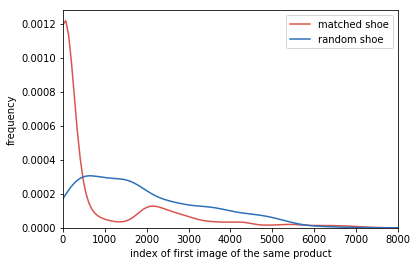

In [420]:
calc_rand_and_match_distributions(200,odf,oxf,'Oxfords')

In [254]:
num = 100
min_prod_ranks,prod_placements = calc_min_product_ranks(num,oxf,odf,user_category='Oxfords')


oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8914295_color_73141
like_product_key: oxfords_product_8935608_color_708966
like_product_key: oxfords_product_8604404_color_3
like_product_key: oxfords_product_8854331_color_3
product_indices: [2000 2001 2002 2003]
cur image_index key: oxfords_product_8914295_color_73141
image_index : 2000
npwhere (this is rank) : [4546]
n rows of odf (should be same as rank...): (4546, 14)
num unique keys : 1944
cur image_index key: oxfords_product_8914295_color_73141
image_index : 2001
npwhere (this is rank) : [59]
n rows of odf (should be same as rank...): (59, 14)
num unique keys : 59
cur image_index key: oxfords_product_8914295_color_73141
image_index : 2002
npwhere (this is rank) : [5913]
n rows of odf (should be same as rank...): (5913, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8914295_color_73141
image_index : 2003
npwhere (t

num unique keys : 1820
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_9145056_color_3
like_product_key: oxfords_product_9035261_color_72
like_product_key: oxfords_product_8868554_color_3
like_product_key: oxfords_product_9006540_color_3
product_indices: [7220 7221 7222 7223]
cur image_index key: oxfords_product_9145056_color_3
image_index : 7220
npwhere (this is rank) : [1381]
n rows of odf (should be same as rank...): (1381, 14)
num unique keys : 802
cur image_index key: oxfords_product_9145056_color_3
image_index : 7221
npwhere (this is rank) : [4617]
n rows of odf (should be same as rank...): (4617, 14)
num unique keys : 1715
cur image_index key: oxfords_product_9145056_color_3
image_index : 7222
npwhere (this is rank) : [69]
n rows of odf (should be same as rank...): (69, 14)
num unique keys : 62
cur image_index key: oxfords_product_9145056_color_3
image_index : 7223
npwhere (thi

n rows of odf (should be same as rank...): (6229, 14)
num unique keys : 1948
product_indices: [1976 1977 1978 1979]
cur image_index key: oxfords_product_8808250_color_29320
image_index : 1976
npwhere (this is rank) : [3918]
n rows of odf (should be same as rank...): (3918, 14)
num unique keys : 1938
cur image_index key: oxfords_product_8808250_color_29320
image_index : 1977
npwhere (this is rank) : [857]
n rows of odf (should be same as rank...): (857, 14)
num unique keys : 857
cur image_index key: oxfords_product_8808250_color_29320
image_index : 1978
npwhere (this is rank) : [4621]
n rows of odf (should be same as rank...): (4621, 14)
num unique keys : 1945
cur image_index key: oxfords_product_8808250_color_29320
image_index : 1979
npwhere (this is rank) : [6113]
n rows of odf (should be same as rank...): (6113, 14)
num unique keys : 1948
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_prod

num unique keys : 1947
cur image_index key: oxfords_product_8394119_color_72
image_index : 2257
npwhere (this is rank) : [4201]
n rows of odf (should be same as rank...): (4201, 14)
num unique keys : 1721
cur image_index key: oxfords_product_8394119_color_72
image_index : 2258
npwhere (this is rank) : [4382]
n rows of odf (should be same as rank...): (4382, 14)
num unique keys : 1756
cur image_index key: oxfords_product_8394119_color_72
image_index : 2259
npwhere (this is rank) : [5750]
n rows of odf (should be same as rank...): (5750, 14)
num unique keys : 1902
product_indices: [3288 3289 3290 3291]
cur image_index key: oxfords_product_8284093_color_469987
image_index : 3288
npwhere (this is rank) : [6864]
n rows of odf (should be same as rank...): (6864, 14)
num unique keys : 1946
cur image_index key: oxfords_product_8284093_color_469987
image_index : 3289
npwhere (this is rank) : [2930]
n rows of odf (should be same as rank...): (2930, 14)
num unique keys : 1458
cur image_index key:

num unique keys : 696
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8266600_color_617
like_product_key: oxfords_product_8092253_color_2898
like_product_key: oxfords_product_8296580_color_20
like_product_key: oxfords_product_8743292_color_184651
product_indices: [3104 3105 3106 3107]
cur image_index key: oxfords_product_8266600_color_617
image_index : 3104
npwhere (this is rank) : [6146]
n rows of odf (should be same as rank...): (6146, 14)
num unique keys : 1943
cur image_index key: oxfords_product_8266600_color_617
image_index : 3105
npwhere (this is rank) : [6241]
n rows of odf (should be same as rank...): (6241, 14)
num unique keys : 1944
cur image_index key: oxfords_product_8266600_color_617
image_index : 3106
npwhere (this is rank) : [2535]
n rows of odf (should be same as rank...): (2535, 14)
num unique keys : 1349
cur image_index key: oxfords_product_8266600_color_617
image_i

num unique keys : 481
cur image_index key: oxfords_product_8924315_color_69
image_index : 1587
npwhere (this is rank) : [900]
n rows of odf (should be same as rank...): (900, 14)
num unique keys : 619
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_9103465_color_3938
like_product_key: oxfords_product_8250801_color_3
like_product_key: oxfords_product_8430981_color_3
like_product_key: oxfords_product_8394125_color_72
product_indices: [4632 4633 4634 4635]
cur image_index key: oxfords_product_9103465_color_3938
image_index : 4632
npwhere (this is rank) : [5363]
n rows of odf (should be same as rank...): (5363, 14)
num unique keys : 1818
cur image_index key: oxfords_product_9103465_color_3938
image_index : 4633
npwhere (this is rank) : [1098]
n rows of odf (should be same as rank...): (1098, 14)
num unique keys : 682
cur image_index key: oxfords_product_9103465_color_3938
image_index : 46

n rows of odf (should be same as rank...): (6069, 14)
num unique keys : 1934
cur image_index key: oxfords_product_9034784_color_9
image_index : 5670
npwhere (this is rank) : [3564]
n rows of odf (should be same as rank...): (3564, 14)
num unique keys : 1663
cur image_index key: oxfords_product_9034784_color_9
image_index : 5671
npwhere (this is rank) : [3216]
n rows of odf (should be same as rank...): (3216, 14)
num unique keys : 1577
product_indices: [1960 1961 1962 1963]
cur image_index key: oxfords_product_9178199_color_435437
image_index : 1960
npwhere (this is rank) : [4977]
n rows of odf (should be same as rank...): (4977, 14)
num unique keys : 1880
cur image_index key: oxfords_product_9178199_color_435437
image_index : 1961
npwhere (this is rank) : [6091]
n rows of odf (should be same as rank...): (6091, 14)
num unique keys : 1934
cur image_index key: oxfords_product_9178199_color_435437
image_index : 1962
npwhere (this is rank) : [896]
n rows of odf (should be same as rank...):

cur image_index key: oxfords_product_8836670_color_3
image_index : 2330
npwhere (this is rank) : [765]
n rows of odf (should be same as rank...): (765, 14)
num unique keys : 501
cur image_index key: oxfords_product_8836670_color_3
image_index : 2331
npwhere (this is rank) : [1022]
n rows of odf (should be same as rank...): (1022, 14)
num unique keys : 628
product_indices: [5308 5309 5310 5311]
cur image_index key: oxfords_product_9034200_color_3
image_index : 5308
npwhere (this is rank) : [4421]
n rows of odf (should be same as rank...): (4421, 14)
num unique keys : 1706
cur image_index key: oxfords_product_9034200_color_3
image_index : 5309
npwhere (this is rank) : [6963]
n rows of odf (should be same as rank...): (6963, 14)
num unique keys : 1936
cur image_index key: oxfords_product_9034200_color_3
image_index : 5310
npwhere (this is rank) : [3720]
n rows of odf (should be same as rank...): (3720, 14)
num unique keys : 1546
cur image_index key: oxfords_product_9034200_color_3
image_i

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_9068509_color_524
like_product_key: oxfords_product_8868554_color_184651
like_product_key: oxfords_product_7181815_color_1177
like_product_key: oxfords_product_8854356_color_6
product_indices: [6976 6977 6978 6979]
cur image_index key: oxfords_product_9068509_color_524
image_index : 6976
npwhere (this is rank) : [2831]
n rows of odf (should be same as rank...): (2831, 14)
num unique keys : 1533
cur image_index key: oxfords_product_9068509_color_524
image_index : 6977
npwhere (this is rank) : [7084]
n rows of odf (should be same as rank...): (7084, 14)
num unique keys : 1947
cur image_index key: oxfords_product_9068509_color_524
image_index : 6978
npwhere (this is rank) : [3730]
n rows of odf (should be same as rank...): (3730, 14)
num unique keys : 1756
cur image_index key: oxfords_product_9068509_color_524
image_index : 6979
npwhere (th

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8515360_color_3
like_product_key: oxfords_product_9075680_color_340794
like_product_key: oxfords_product_8321171_color_340794
like_product_key: oxfords_product_8812792_color_144
product_indices: [2780 2781 2782 2783]
cur image_index key: oxfords_product_8515360_color_3
image_index : 2780
npwhere (this is rank) : [7669]
n rows of odf (should be same as rank...): (7669, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8515360_color_3
image_index : 2781
npwhere (this is rank) : [3055]
n rows of odf (should be same as rank...): (3055, 14)
num unique keys : 1364
cur image_index key: oxfords_product_8515360_color_3
image_index : 2782
npwhere (this is rank) : [6866]
n rows of odf (should be same as rank...): (6866, 14)
num unique keys : 1940
cur image_index key: oxfords_product_8515360_color_3
image_index : 2783
npwhere (this is 

cur image_index key: oxfords_product_8952567_color_3
image_index : 4221
npwhere (this is rank) : [1325]
n rows of odf (should be same as rank...): (1325, 14)
num unique keys : 734
cur image_index key: oxfords_product_8952567_color_3
image_index : 4222
npwhere (this is rank) : [1833]
n rows of odf (should be same as rank...): (1833, 14)
num unique keys : 929
cur image_index key: oxfords_product_8952567_color_3
image_index : 4223
npwhere (this is rank) : [323]
n rows of odf (should be same as rank...): (323, 14)
num unique keys : 222
product_indices: []
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8987274_color_72
like_product_key: oxfords_product_8919984_color_3
like_product_key: oxfords_product_9098899_color_3
like_product_key: oxfords_product_9092232_color_6
product_indices: [2168 2169 2170 2171]
cur image_index key: oxfords_product_8987274_color_72
image_index : 2168
npwhere (thi

num unique keys : 1842
cur image_index key: oxfords_product_8586346_color_728
image_index : 4346
npwhere (this is rank) : [1623]
n rows of odf (should be same as rank...): (1623, 14)
num unique keys : 976
cur image_index key: oxfords_product_8586346_color_728
image_index : 4347
npwhere (this is rank) : [404]
n rows of odf (should be same as rank...): (404, 14)
num unique keys : 309
product_indices: []
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8685998_color_617055
like_product_key: oxfords_product_8487310_color_774569
like_product_key: oxfords_product_8952189_color_573784
like_product_key: oxfords_product_8952192_color_246721
product_indices: [7268 7269 7270 7271]
cur image_index key: oxfords_product_8685998_color_617055
image_index : 7268
npwhere (this is rank) : [6904]
n rows of odf (should be same as rank...): (6904, 14)
num unique keys : 1948
cur image_index key: oxfords_prod

product_indices: [1168 1169 1170 1171]
cur image_index key: oxfords_product_9139847_color_677
image_index : 1168
npwhere (this is rank) : [5704]
n rows of odf (should be same as rank...): (5704, 14)
num unique keys : 1939
cur image_index key: oxfords_product_9139847_color_677
image_index : 1169
npwhere (this is rank) : [6932]
n rows of odf (should be same as rank...): (6932, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9139847_color_677
image_index : 1170
npwhere (this is rank) : [27]
n rows of odf (should be same as rank...): (27, 14)
num unique keys : 22
cur image_index key: oxfords_product_9139847_color_677
image_index : 1171
npwhere (this is rank) : [601]
n rows of odf (should be same as rank...): (601, 14)
num unique keys : 443
product_indices: [3384 3385 3386 3387]
cur image_index key: oxfords_product_9035382_color_820
image_index : 3384
npwhere (this is rank) : [5248]
n rows of odf (should be same as rank...): (5248, 14)
num unique keys : 1921
cur image_index 

n rows of odf (should be same as rank...): (6120, 14)
num unique keys : 1944
product_indices: [4672 4673 4674 4675]
cur image_index key: oxfords_product_8588347_color_3
image_index : 4672
npwhere (this is rank) : [6353]
n rows of odf (should be same as rank...): (6353, 14)
num unique keys : 1945
cur image_index key: oxfords_product_8588347_color_3
image_index : 4673
npwhere (this is rank) : [2831]
n rows of odf (should be same as rank...): (2831, 14)
num unique keys : 1638
cur image_index key: oxfords_product_8588347_color_3
image_index : 4674
npwhere (this is rank) : [6310]
n rows of odf (should be same as rank...): (6310, 14)
num unique keys : 1945
cur image_index key: oxfords_product_8588347_color_3
image_index : 4675
npwhere (this is rank) : [4321]
n rows of odf (should be same as rank...): (4321, 14)
num unique keys : 1870
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8546816_c

cur image_index key: oxfords_product_9075665_color_3
image_index : 6694
npwhere (this is rank) : [5623]
n rows of odf (should be same as rank...): (5623, 14)
num unique keys : 1913
cur image_index key: oxfords_product_9075665_color_3
image_index : 6695
npwhere (this is rank) : [4789]
n rows of odf (should be same as rank...): (4789, 14)
num unique keys : 1830
product_indices: [2596 2597 2598 2599]
cur image_index key: oxfords_product_9114009_color_3
image_index : 2596
npwhere (this is rank) : [4707]
n rows of odf (should be same as rank...): (4707, 14)
num unique keys : 1817
cur image_index key: oxfords_product_9114009_color_3
image_index : 2597
npwhere (this is rank) : [7381]
n rows of odf (should be same as rank...): (7381, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9114009_color_3
image_index : 2598
npwhere (this is rank) : [5165]
n rows of odf (should be same as rank...): (5165, 14)
num unique keys : 1886
cur image_index key: oxfords_product_9114009_color_3
ima

cur image_index key: oxfords_product_8808250_color_29320
image_index : 1979
npwhere (this is rank) : [5021]
n rows of odf (should be same as rank...): (5021, 14)
num unique keys : 1815
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8743294_color_184651
like_product_key: oxfords_product_8945874_color_184651
like_product_key: oxfords_product_9080303_color_20
like_product_key: oxfords_product_9111668_color_342
product_indices: [3996 3997 3998 3999]
cur image_index key: oxfords_product_8743294_color_184651
image_index : 3996
npwhere (this is rank) : [7397]
n rows of odf (should be same as rank...): (7397, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8743294_color_184651
image_index : 3997
npwhere (this is rank) : [1902]
n rows of odf (should be same as rank...): (1902, 14)
num unique keys : 1632
cur image_index key: oxfords_product_8743294_color_184651
image_index : 39

num unique keys : 1948
cur image_index key: oxfords_product_8785277_color_184651
image_index : 805
npwhere (this is rank) : [1729]
n rows of odf (should be same as rank...): (1729, 14)
num unique keys : 1727
cur image_index key: oxfords_product_8785277_color_184651
image_index : 806
npwhere (this is rank) : [5497]
n rows of odf (should be same as rank...): (5497, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8785277_color_184651
image_index : 807
npwhere (this is rank) : [5851]
n rows of odf (should be same as rank...): (5851, 14)
num unique keys : 1948
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8814970_color_133125
like_product_key: oxfords_product_9119136_color_3
like_product_key: oxfords_product_8770759_color_4762
like_product_key: oxfords_product_8867849_color_3
product_indices: [3332 3333 3334 3335]
cur image_index key: oxfords_product_8814970_color_133125


num unique keys : 1498
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8883734_color_642
like_product_key: oxfords_product_9035412_color_790
like_product_key: oxfords_product_9034234_color_790
like_product_key: oxfords_product_9139855_color_790
product_indices: []
product_indices: [1600 1601 1602 1603]
cur image_index key: oxfords_product_9035412_color_790
image_index : 1600
npwhere (this is rank) : [5671]
n rows of odf (should be same as rank...): (5671, 14)
num unique keys : 1796
cur image_index key: oxfords_product_9035412_color_790
image_index : 1601
npwhere (this is rank) : [5884]
n rows of odf (should be same as rank...): (5884, 14)
num unique keys : 1827
cur image_index key: oxfords_product_9035412_color_790
image_index : 1602
npwhere (this is rank) : [4903]
n rows of odf (should be same as rank...): (4903, 14)
num unique keys : 1691
cur image_index key: oxfords_product_9035412

num unique keys : 1398
cur image_index key: oxfords_product_8979631_color_707971
image_index : 3963
npwhere (this is rank) : [2430]
n rows of odf (should be same as rank...): (2430, 14)
num unique keys : 1315
product_indices: [6764 6765 6766 6767]
cur image_index key: oxfords_product_9050418_color_310
image_index : 6764
npwhere (this is rank) : [4875]
n rows of odf (should be same as rank...): (4875, 14)
num unique keys : 1896
cur image_index key: oxfords_product_9050418_color_310
image_index : 6765
npwhere (this is rank) : [6462]
n rows of odf (should be same as rank...): (6462, 14)
num unique keys : 1944
cur image_index key: oxfords_product_9050418_color_310
image_index : 6766
npwhere (this is rank) : [2517]
n rows of odf (should be same as rank...): (2517, 14)
num unique keys : 1341
cur image_index key: oxfords_product_9050418_color_310
image_index : 6767
npwhere (this is rank) : [2490]
n rows of odf (should be same as rank...): (2490, 14)
num unique keys : 1334
product_indices: [21

n rows of odf (should be same as rank...): (4377, 14)
num unique keys : 1893
cur image_index key: oxfords_product_8895394_color_23562
image_index : 5037
npwhere (this is rank) : [6568]
n rows of odf (should be same as rank...): (6568, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8895394_color_23562
image_index : 5038
npwhere (this is rank) : [5189]
n rows of odf (should be same as rank...): (5189, 14)
num unique keys : 1935
cur image_index key: oxfords_product_8895394_color_23562
image_index : 5039
npwhere (this is rank) : [3889]
n rows of odf (should be same as rank...): (3889, 14)
num unique keys : 1825
product_indices: []
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_9045310_color_1912
like_product_key: oxfords_product_8743801_color_627472
like_product_key: oxfords_product_8828738_color_670899
like_product_key: oxfords_product_9049476_color_184651
product_indic

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8910971_color_3
like_product_key: oxfords_product_9070286_color_3
like_product_key: oxfords_product_8777542_color_3
like_product_key: oxfords_product_9136321_color_3
product_indices: [124 125 126 127]
cur image_index key: oxfords_product_8910971_color_3
image_index : 124
npwhere (this is rank) : [4505]
n rows of odf (should be same as rank...): (4505, 14)
num unique keys : 1786
cur image_index key: oxfords_product_8910971_color_3
image_index : 125
npwhere (this is rank) : [6502]
n rows of odf (should be same as rank...): (6502, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8910971_color_3
image_index : 126
npwhere (this is rank) : [3769]
n rows of odf (should be same as rank...): (3769, 14)
num unique keys : 1620
cur image_index key: oxfords_product_8910971_color_3
image_index : 127
npwhere (this is rank) : [3545]
n row

num unique keys : 399
product_indices: [5604 5605 5606 5607]
cur image_index key: oxfords_product_9086953_color_3
image_index : 5604
npwhere (this is rank) : [3304]
n rows of odf (should be same as rank...): (3304, 14)
num unique keys : 1491
cur image_index key: oxfords_product_9086953_color_3
image_index : 5605
npwhere (this is rank) : [5899]
n rows of odf (should be same as rank...): (5899, 14)
num unique keys : 1865
cur image_index key: oxfords_product_9086953_color_3
image_index : 5606
npwhere (this is rank) : [2813]
n rows of odf (should be same as rank...): (2813, 14)
num unique keys : 1357
cur image_index key: oxfords_product_9086953_color_3
image_index : 5607
npwhere (this is rank) : [569]
n rows of odf (should be same as rank...): (569, 14)
num unique keys : 419
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8685998_color_617055
like_product_key: oxfords_product_9140177_colo

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_7344113_color_72
like_product_key: oxfords_product_7344114_color_72
like_product_key: oxfords_product_9075735_color_711138
like_product_key: oxfords_product_8946871_color_3
product_indices: [2980 2981 2982 2983]
cur image_index key: oxfords_product_7344113_color_72
image_index : 2980
npwhere (this is rank) : [1539]
n rows of odf (should be same as rank...): (1539, 14)
num unique keys : 923
cur image_index key: oxfords_product_7344113_color_72
image_index : 2981
npwhere (this is rank) : [6104]
n rows of odf (should be same as rank...): (6104, 14)
num unique keys : 1930
cur image_index key: oxfords_product_7344113_color_72
image_index : 2982
npwhere (this is rank) : [2297]
n rows of odf (should be same as rank...): (2297, 14)
num unique keys : 1251
cur image_index key: oxfords_product_7344113_color_72
image_index : 2983
npwhere (this is ra

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_9008491_color_2865
like_product_key: oxfords_product_8803023_color_660653
like_product_key: oxfords_product_9086943_color_184651
like_product_key: oxfords_product_8895394_color_23562
product_indices: [7024 7025 7026 7027]
cur image_index key: oxfords_product_9008491_color_2865
image_index : 7024
npwhere (this is rank) : [7524]
n rows of odf (should be same as rank...): (7524, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9008491_color_2865
image_index : 7025
npwhere (this is rank) : [1581]
n rows of odf (should be same as rank...): (1581, 14)
num unique keys : 1568
cur image_index key: oxfords_product_9008491_color_2865
image_index : 7026
npwhere (this is rank) : [6693]
n rows of odf (should be same as rank...): (6693, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9008491_color_2865
image_index : 7027


cur image_index key: oxfords_product_9090858_color_3
image_index : 3174
npwhere (this is rank) : [842]
n rows of odf (should be same as rank...): (842, 14)
num unique keys : 501
cur image_index key: oxfords_product_9090858_color_3
image_index : 3175
npwhere (this is rank) : [1574]
n rows of odf (should be same as rank...): (1574, 14)
num unique keys : 829
product_indices: []
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_9159099_color_791896
like_product_key: oxfords_product_9024248_color_310
like_product_key: oxfords_product_9021098_color_20
like_product_key: oxfords_product_9038671_color_20
product_indices: []
product_indices: [7404 7405 7406 7407]
cur image_index key: oxfords_product_9024248_color_310
image_index : 7404
npwhere (this is rank) : [6089]
n rows of odf (should be same as rank...): (6089, 14)
num unique keys : 1908
cur image_index key: oxfords_product_9024248_color_310

num unique keys : 1884
cur image_index key: oxfords_product_9000676_color_605557
image_index : 2847
npwhere (this is rank) : [4047]
n rows of odf (should be same as rank...): (4047, 14)
num unique keys : 1931
product_indices: [6596 6597 6598 6599]
cur image_index key: oxfords_product_9079412_color_84
image_index : 6596
npwhere (this is rank) : [3329]
n rows of odf (should be same as rank...): (3329, 14)
num unique keys : 1910
cur image_index key: oxfords_product_9079412_color_84
image_index : 6597
npwhere (this is rank) : [47]
n rows of odf (should be same as rank...): (47, 14)
num unique keys : 47
cur image_index key: oxfords_product_9079412_color_84
image_index : 6598
npwhere (this is rank) : [2077]
n rows of odf (should be same as rank...): (2077, 14)
num unique keys : 1774
cur image_index key: oxfords_product_9079412_color_84
image_index : 6599
npwhere (this is rank) : [1804]
n rows of odf (should be same as rank...): (1804, 14)
num unique keys : 1690
oxf_by_cat.shape : (7792, 4096

n rows of odf (should be same as rank...): (3476, 14)
num unique keys : 1450
cur image_index key: oxfords_product_8867073_color_316
image_index : 4581
npwhere (this is rank) : [4493]
n rows of odf (should be same as rank...): (4493, 14)
num unique keys : 1649
cur image_index key: oxfords_product_8867073_color_316
image_index : 4582
npwhere (this is rank) : [5249]
n rows of odf (should be same as rank...): (5249, 14)
num unique keys : 1754
cur image_index key: oxfords_product_8867073_color_316
image_index : 4583
npwhere (this is rank) : [5620]
n rows of odf (should be same as rank...): (5620, 14)
num unique keys : 1792
product_indices: [2952 2953 2954 2955]
cur image_index key: oxfords_product_9050750_color_478744
image_index : 2952
npwhere (this is rank) : [2077]
n rows of odf (should be same as rank...): (2077, 14)
num unique keys : 1065
cur image_index key: oxfords_product_9050750_color_478744
image_index : 2953
npwhere (this is rank) : [7062]
n rows of odf (should be same as rank...

cur image_index key: oxfords_product_9008487_color_2865
image_index : 3455
npwhere (this is rank) : [6448]
n rows of odf (should be same as rank...): (6448, 14)
num unique keys : 1943
product_indices: [136 137 138 139]
cur image_index key: oxfords_product_9053994_color_20
image_index : 136
npwhere (this is rank) : [6081]
n rows of odf (should be same as rank...): (6081, 14)
num unique keys : 1938
cur image_index key: oxfords_product_9053994_color_20
image_index : 137
npwhere (this is rank) : [3185]
n rows of odf (should be same as rank...): (3185, 14)
num unique keys : 1672
cur image_index key: oxfords_product_9053994_color_20
image_index : 138
npwhere (this is rank) : [5269]
n rows of odf (should be same as rank...): (5269, 14)
num unique keys : 1912
cur image_index key: oxfords_product_9053994_color_20
image_index : 139
npwhere (this is rank) : [3675]
n rows of odf (should be same as rank...): (3675, 14)
num unique keys : 1748
product_indices: [6440 6441 6442 6443]
cur image_index ke

oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8910388_color_13978
like_product_key: oxfords_product_8859624_color_983
like_product_key: oxfords_product_9046931_color_184651
like_product_key: oxfords_product_8923812_color_6
product_indices: [7076 7077 7078 7079]
cur image_index key: oxfords_product_8910388_color_13978
image_index : 7076
npwhere (this is rank) : [3262]
n rows of odf (should be same as rank...): (3262, 14)
num unique keys : 1590
cur image_index key: oxfords_product_8910388_color_13978
image_index : 7077
npwhere (this is rank) : [6299]
n rows of odf (should be same as rank...): (6299, 14)
num unique keys : 1944
cur image_index key: oxfords_product_8910388_color_13978
image_index : 7078
npwhere (this is rank) : [2456]
n rows of odf (should be same as rank...): (2456, 14)
num unique keys : 1333
cur image_index key: oxfords_product_8910388_color_13978
image_index : 7079
np

cur image_index key: oxfords_product_8924403_color_3
image_index : 2658
npwhere (this is rank) : [3360]
n rows of odf (should be same as rank...): (3360, 14)
num unique keys : 1590
cur image_index key: oxfords_product_8924403_color_3
image_index : 2659
npwhere (this is rank) : [4855]
n rows of odf (should be same as rank...): (4855, 14)
num unique keys : 1859
product_indices: [7512 7513 7514 7515]
cur image_index key: oxfords_product_8883734_color_3
image_index : 7512
npwhere (this is rank) : [5824]
n rows of odf (should be same as rank...): (5824, 14)
num unique keys : 1927
cur image_index key: oxfords_product_8883734_color_3
image_index : 7513
npwhere (this is rank) : [7665]
n rows of odf (should be same as rank...): (7665, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8883734_color_3
image_index : 7514
npwhere (this is rank) : [3024]
n rows of odf (should be same as rank...): (3024, 14)
num unique keys : 1497
cur image_index key: oxfords_product_8883734_color_3
ima

num unique keys : 1140
cur image_index key: oxfords_product_9078238_color_111
image_index : 7694
npwhere (this is rank) : [1920]
n rows of odf (should be same as rank...): (1920, 14)
num unique keys : 1038
cur image_index key: oxfords_product_9078238_color_111
image_index : 7695
npwhere (this is rank) : [1676]
n rows of odf (should be same as rank...): (1676, 14)
num unique keys : 932
product_indices: [6292 6293 6294 6295]
cur image_index key: oxfords_product_8567735_color_3
image_index : 6292
npwhere (this is rank) : [7612]
n rows of odf (should be same as rank...): (7612, 14)
num unique keys : 1948
cur image_index key: oxfords_product_8567735_color_3
image_index : 6293
npwhere (this is rank) : [5360]
n rows of odf (should be same as rank...): (5360, 14)
num unique keys : 1775
cur image_index key: oxfords_product_8567735_color_3
image_index : 6294
npwhere (this is rank) : [6093]
n rows of odf (should be same as rank...): (6093, 14)
num unique keys : 1859
cur image_index key: oxfords_p

cur image_index key: oxfords_product_113614_color_21680
image_index : 1478
npwhere (this is rank) : [3696]
n rows of odf (should be same as rank...): (3696, 14)
num unique keys : 1840
cur image_index key: oxfords_product_113614_color_21680
image_index : 1479
npwhere (this is rank) : [2465]
n rows of odf (should be same as rank...): (2465, 14)
num unique keys : 1427
product_indices: [4392 4393 4394 4395]
cur image_index key: oxfords_product_9005596_color_151
image_index : 4392
npwhere (this is rank) : [7769]
n rows of odf (should be same as rank...): (7769, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9005596_color_151
image_index : 4393
npwhere (this is rank) : [7650]
n rows of odf (should be same as rank...): (7650, 14)
num unique keys : 1948
cur image_index key: oxfords_product_9005596_color_151
image_index : 4394
npwhere (this is rank) : [4037]
n rows of odf (should be same as rank...): (4037, 14)
num unique keys : 1885
cur image_index key: oxfords_product_9005596

n rows of odf (should be same as rank...): (26, 14)
num unique keys : 24
product_indices: [3140 3141 3142 3143]
cur image_index key: oxfords_product_8980198_color_69
image_index : 3140
npwhere (this is rank) : [3762]
n rows of odf (should be same as rank...): (3762, 14)
num unique keys : 1738
cur image_index key: oxfords_product_8980198_color_69
image_index : 3141
npwhere (this is rank) : [5861]
n rows of odf (should be same as rank...): (5861, 14)
num unique keys : 1937
cur image_index key: oxfords_product_8980198_color_69
image_index : 3142
npwhere (this is rank) : [1969]
n rows of odf (should be same as rank...): (1969, 14)
num unique keys : 1142
cur image_index key: oxfords_product_8980198_color_69
image_index : 3143
npwhere (this is rank) : [1002]
n rows of odf (should be same as rank...): (1002, 14)
num unique keys : 690
oxf_by_cat.shape : (7792, 4096) 
odf_by_cat.shape : (7792, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 7792)
like_product_key: oxfords_product_8880846_co

In [153]:
print('prod_placements: {}'.format(prod_placements))
print('min_prod_ranks: {}'.format(min_prod_ranks))

prod_placements: [[447, 248, 599], [366, 981], [1456, 477, 1046, 1699], [143, 479, 1135], [608, 97, 324, 98], [15, 1528, 297], [1002, 777, 970], [323, 1469, 924, 1165], [405, 913, 409, 949], [978, 110, 1680, 103], [1764, 1157, 1550, 1343], [1053, 208, 304, 1084], [455, 1042], [905, 1343, 1385, 884], [1525, 1162, 1898], [730, 868, 398, 83], [1188, 1643, 1438], [805, 340, 213], [1931, 1793, 416, 859], [436, 1011, 1580, 690], [249, 1112, 189, 903], [1318, 654, 40], [997, 132, 1259, 677], [1773, 1897, 1739, 1754], [1763, 1883, 1635, 1439], [155, 743, 706, 1081], [1647, 1187, 1202, 1874], [1362, 1266, 1488, 900], [942, 163], [1704, 1329, 321, 49], [95, 237, 668], [1471, 1060], [661, 975, 491], [73, 714, 1303, 52], [501, 612, 917], [1045, 238, 323, 1006], [843, 612, 224], [253], [347, 1038, 896], [847, 1215, 746], [414, 572, 804], [550, 33, 15, 417], [999, 300, 37], [1662, 1609, 844, 1394], [1026, 860, 94], [684, 394, 463, 211], [73, 956, 561, 289], [982, 1088, 899, 1119], [1044, 421], [648,

In [158]:
def calc_fraction_of_top_n_predictions(top_n,prod_placements):
    #total = len(prod_placements)
    total = 0
    num_lt_top_n = 0
    for product in prod_placements:
        #print(product)
        if len(product)>0:
            total +=1
            if min(product)<top_n:
                num_lt_top_n +=1
    return num_lt_top_n/float(total)

In [256]:
top_n = 100
frac_in_top_n = calc_fraction_of_top_n_predictions(top_n,prod_placements)
print('frac in top {}: {}%'.format(top_n,100*frac_in_top_n))

frac in top 100: 19.0%


In [260]:
top_n = 100
rand_frac_in_top_n = calc_random_top_n(top_n,odf[odf['subcategory']=='Oxfords'].shape[0],prod_placements)
print('rand frac in top {}: {}%'.format(top_n,100*rand_frac_in_top_n))

rand frac in top 100: 5.0%


In [259]:
def calc_random_top_n(top_n,number_products_in_category,prod_placements):
    total = 0
    num_lt_top_n = 0
    for product in prod_placements:
        if len(product)==0:
            continue
        else:
            ind_list = np.random.choice(number_products_in_category,len(product))
            total += 1
            if min(ind_list)<top_n:
                num_lt_top_n +=1
    return num_lt_top_n/float(total)
        

In [81]:
def calc_average_min_like_product_rank(num,oxf,odf,classifier='euclidean',user_category=None):
    average_mins_by_product = []
    
    for i in np.random.choice(oxf.shape[0],num):
        ranks_by_product = find_zap_ranks(i,oxf,odf)
        count = 0
        mins = []
        for like_product_list in ranks_by_product:
            if like_product_list is not None and len(like_product_list)==5:
                mins.append(min(like_product_list))
                count +=1

        #mins = [min(like_product_list) for like_product_list in ranks_by_product]
        avg = sum(mins)/float(count)
        average_mins_by_product.append(avg)
    return average_mins_by_product

In [76]:
np.random.choice(oxf.shape[0],num)

array([ 5111, 13961, 14113,  3290, 16226, 13825, 15877,  6023, 15455,
       16128, 20281,  6051,  8043, 10545,  7343, 13518, 17047,  6590,
        3490,  7101, 22775,   407, 13327, 15975, 14107,  1072, 13082,
       21183,  2163, 15767, 16978,  3526, 16890,  4045, 20436, 21590,
        1093,  4639,  7678,  6950, 13642, 22025,  8477,   390, 11605,
       19649, 18338, 15277, 12275, 21671,  1291,  3482,   906, 15741,
       16587, 16863, 22532, 21239, 12602, 22591, 16245, 11069,  4135,
       22170, 21430, 14761, 12957, 15454,   376,  5707,  2867, 12732,
       13427, 17507, 13147, 16810, 14219, 11416, 13132,  7031,  8948,
         192, 21835, 20223,  6183,  7606,  6552,  6526, 21835,  9088,
        8863, 15365, 13932, 21670, 13347, 13570, 11639, 16406,  7223,
        6232])

In [ ]:
def rank_zap_matches(input_image_index,oxf,odf,classifier='euclidean',user_category=None):
    best_row, frugal_row, premium_row, best_matches = find_top_matches(input_image_index,top_n,oxf,odf,classifier,user_category)
    print('Original Image')
    PATH = best_row['image_path']
    display(Image(filename = PATH, width=100, height=100))
    for i in range(len(best_matches)):
        sim1_PATH = best_matches[i]['image_path']
        like_keys = [best_row['like_product_key_{}'.format(lpi)] for lpi in range(4)]
        zap_sim = False
        if best_matches[i]['key'] in like_keys:
            zap_sim = True
        print('Similar Shoe: #{}, Zappos Similar: {}'.format(i+1,zap_sim))
        #print('path: {}'.format(PATH))
        display(Image(filename = sim1_PATH, width=100, height=100))

oxf_by_cat.shape : (20768, 4096) 
odf_by_cat.shape : (20768, 14) 
oxf.shape: (20768, 4096)
distances.shape : (1, 20768)
distances[best_args]: 
[ 0.         42.05758662 49.80433202 50.93504423 51.86499346 52.68031703
 53.46285876 53.60530177 53.83774564 53.85319574]
best_args: [ 1000  7244  2760 11896 10332  1238  6340  7247  1003 12480]
best_match_row : brand                                                               UGG
color                                                     Stout Leather
image_path            /Users/bechtel/Work/Insight/shoezam/zap_scrap/...
key                                  boots_product_8553807_color_241589
msrp                                                            $199.95
name                                                         Hendren TL
sale                                                                NaN
subcategory                                                       Boots
url                   https://www.zappos.com/p/ugg-hendren-tl-stout-

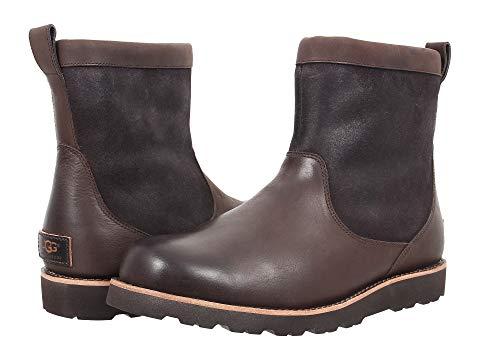

Similar Shoe: #1, Zappos Similar: False


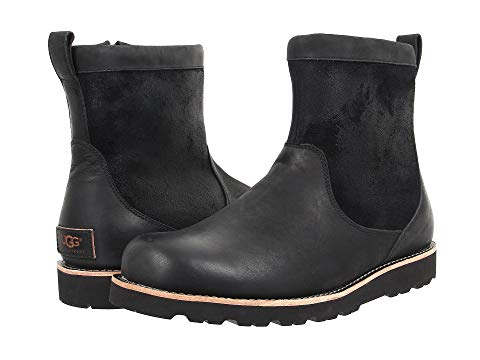

Similar Shoe: #2, Zappos Similar: False


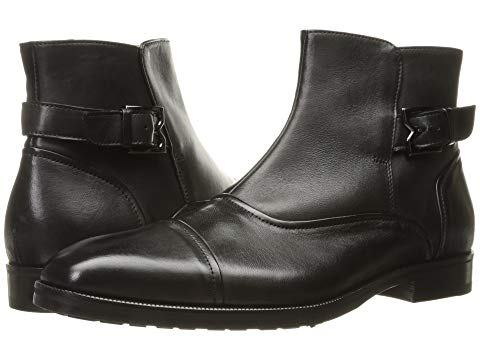

Similar Shoe: #3, Zappos Similar: False


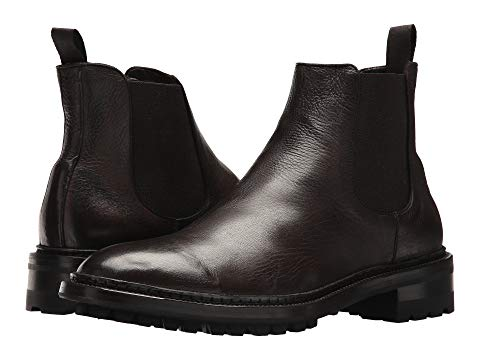

Similar Shoe: #4, Zappos Similar: False


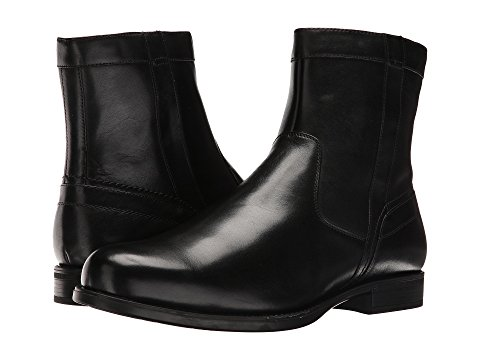

Similar Shoe: #5, Zappos Similar: False


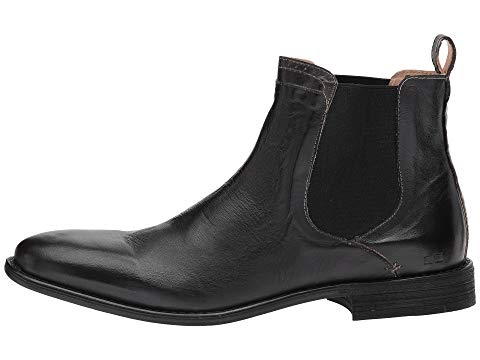

Similar Shoe: #6, Zappos Similar: False


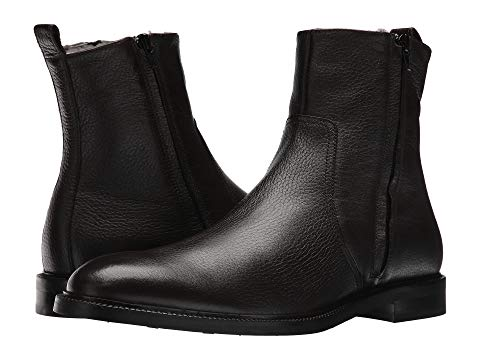

Similar Shoe: #7, Zappos Similar: False


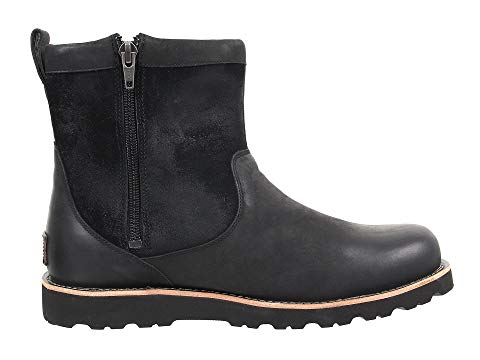

Similar Shoe: #8, Zappos Similar: False


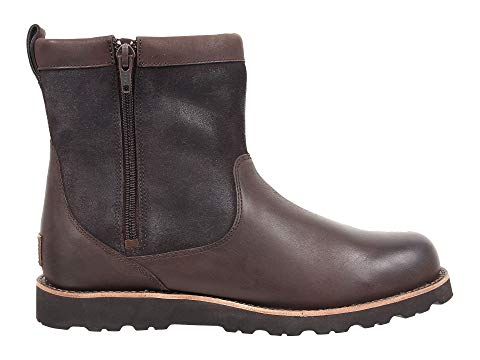

Similar Shoe: #9, Zappos Similar: False


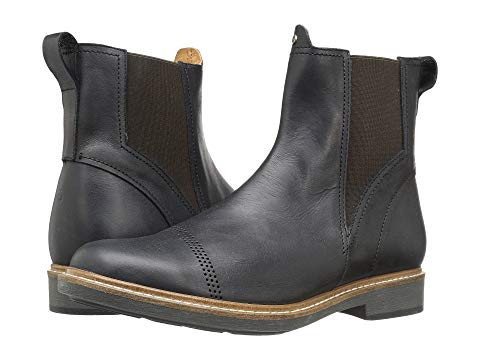

In [388]:
display_matches(1000,10,oxf,odf)

In [62]:
input_image_index = 0
best_match_row,best_rows,ranks_by_product = find_zap_matches(input_image_index,oxf,odf,classifier='euclidean',user_category=None)

oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
[150 151 152 153 154]
image_index : 150
npwhere : [20]
image_index : 151
npwhere : [8452]
image_index : 152
npwhere : [26]
image_index : 153
npwhere : [110]
image_index : 154
npwhere : [10843]
[530 531 532 533 534]
image_index : 530
npwhere : [140]
image_index : 531
npwhere : [8283]
image_index : 532
npwhere : [186]
image_index : 533
npwhere : [252]
image_index : 534
npwhere : [13976]
[170 171 172 173 174]
image_index : 170
npwhere : [21]
image_index : 171
npwhere : [8889]
image_index : 172
npwhere : [73]
image_index : 173
npwhere : [272]
image_index : 174
npwhere : [16670]
[190 191 192 193 194]
image_index : 190
npwhere : [2]
image_index : 191
npwhere : [6356]
image_index : 192
npwhere : [51]
image_index : 193
npwhere : [66]
image_index : 194
npwhere : [9695]
distances[best_args]: 
[  0.          40.1303115   43.00181037 ... 137.16075085 138.21454489
 139.04469913]
b

In [63]:
ranks_by_product

[[20, 8452, 26, 110, 10843],
 [140, 8283, 186, 252, 13976],
 [21, 8889, 73, 272, 16670],
 [2, 6356, 51, 66, 9695]]

In [32]:
like_product_indices

[array([150, 151, 152, 153, 154]),
 array([530, 531, 532, 533, 534]),
 array([170, 171, 172, 173, 174]),
 array([190, 191, 192, 193, 194])]

oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
product_indices: []
product_indices: []
product_indices: []
product_indices: []


In [82]:
num = 5
avg_mins_by_product = calc_average_min_like_product_rank(num,oxf,odf)


oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
[]
[7365 7366 7367 7368 7369]
image_index : 7365
npwhere : [9652]
image_index : 7366
npwhere : [205]
image_index : 7367
npwhere : [5730]
image_index : 7368
npwhere : [7726]
image_index : 7369
npwhere : [2109]
[]
[5225 5226 5227 5228 5229]
image_index : 5225
npwhere : [5817]
image_index : 5226
npwhere : [14]
image_index : 5227
npwhere : [5052]
image_index : 5228
npwhere : [10242]
image_index : 5229
npwhere : [3851]
oxf_by_cat.shape : (22875, 4096) 
odf_by_cat.shape : (22875, 14) 
oxf.shape: (22875, 4096)
distances.shape : (1, 22875)
[21645 21646 21647 21648 21649]
image_index : 21645
npwhere : [393]
image_index : 21646
npwhere : [17739]
image_index : 21647
npwhere : [28]
image_index : 21648
npwhere : [33]
image_index : 21649
npwhere : [13451]
[]
[22515 22516 22517 22518 22519]
image_index : 22515
npwhere : [1370]
image_index : 22516
npwhere : [17573]
image_index : 2251

In [85]:
np.mean(avg_mins_by_product)

174.35

In [413]:
def plot_image_array(image_index, odf,oxf):
    n=6
    input_feature_vec = oxf[image_index,:][None,:]
    sim1_PATH = odf.iloc[image_index,:]['image_path']
    print('Original Image')
    display(Image(filename = sim1_PATH, width=300, height=300))
    oxf = oxf[odf['view']==odf.iloc[image_index,:]['view'],:]
    odf = odf[odf['view']==odf.iloc[image_index,:]['view']]
    ind_list = np.random.choice(oxf.shape[0],n**2)
    f, axarr = plt.subplots(n, n,figsize=(12,12))
    count = 0

    oxf_by_cat = oxf[ind_list,:]
    odf_by_cat = odf.iloc[ind_list,:]
    #print('oxf.shape: {}'.format(oxf.shape))
    #distances = cdist(self.input_feature_vec,self.oxf, self.classifier)
    distances = cdist(input_feature_vec,oxf_by_cat, 'euclidean')
    #print('distances.shape : {}'.format(distances.shape))
    best_args = np.argsort(distances[0,:])[:]
    

    for i in range(n):
        for j in range(n):
            sim1_PATH = odf_by_cat.iloc[count,:]['image_path']
            #print('sim1_PATH: {}'.format(sim1_PATH))
            im_pil = PIL.Image.open(sim1_PATH)
            basewidth=400
            wpercent = (basewidth/float(im_pil.size[0]))
            hsize = int((float(im_pil.size[1])*float(wpercent)))
            im_pil = im_pil.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
            #print('im_pil: {}'.format(im_pil))
            img_array = np.array(im_pil)
            #print('img_array.shape: {}'.format(img_array.shape))
            axarr[i,j].imshow(img_array)#
            
            axarr[i,j].get_xaxis().set_visible(False)
            axarr[i,j].get_yaxis().set_visible(False)
            if np.where(best_args==count)[0][0]<10:
                for axis in ['top','bottom','left','right']:
                    axarr[i,j].spines[axis].set_linewidth(4)
                    axarr[i,j].spines[axis].set_color('g')
            if np.where(best_args==count)[0][0]<3:
                for axis in ['top','bottom','left','right']:
                    axarr[i,j].spines[axis].set_linewidth(4)
                    axarr[i,j].spines[axis].set_color('r')
            count +=1
            #axarr[i,j].axhline(linewidth=4, color="r")        # inc. width of x-axis and color it green
            #axarr[i,j].axvline(linewidth=4, color="r")  
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig('test_img_array.png',dpi=300)
    plt.show()

In [416]:
image_index = 4000
sim1_PATH = odf.iloc[image_index,:]['image_path']
print('Original Image: path : {}'.format(sim1_PATH))

Original Image: path : /Users/bechtel/Work/Insight/shoezam/zap_scrap/scripts/images_boots/boots_product_8979079_color_275/boots_product_8979079_color_275_0.jpg


In [391]:
print(odf.shape)

(20768, 14)


Original Image


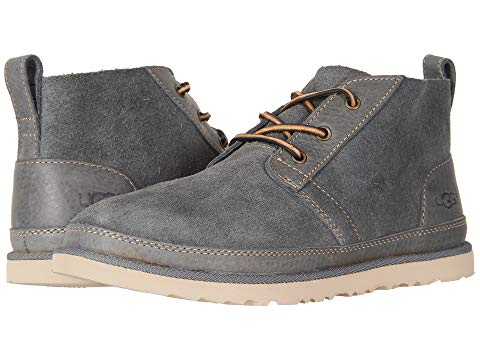

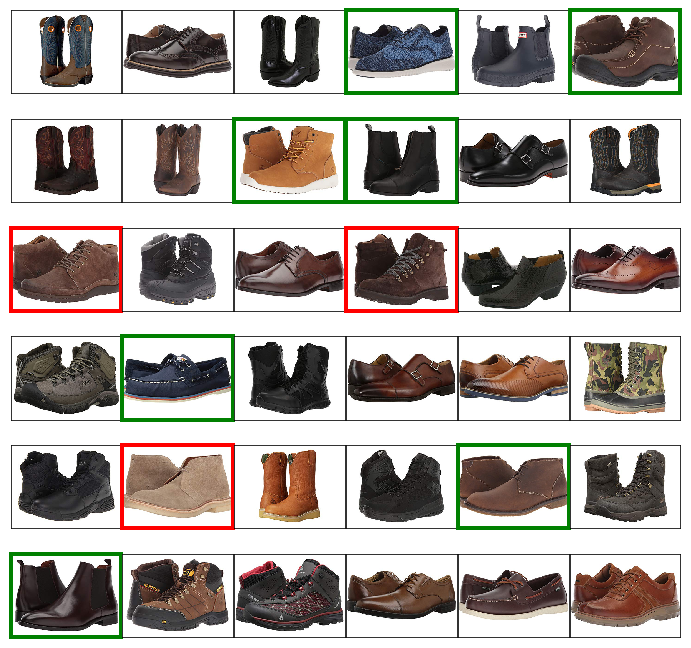

In [414]:
im_index = 4000

plot_image_array(im_index,odf,oxf)

In [406]:
odf[odf['key']=='oxfords_product_9008488_color_2865']['url'].iloc[0]

'https://www.zappos.com/p/florsheim-salerno-wingtip-oxford-cognac-smooth/product/9008488/color/2865'

In [401]:
odf['key'].unique()

array(['boats_product_9167575_color_68541',
       'boats_product_9043304_color_383', 'boats_product_125414_color_28',
       ..., 'oxfords_product_8912758_color_702472',
       'oxfords_product_8735738_color_2865',
       'oxfords_product_8910391_color_13978'], dtype=object)